# 포스코 AI·BIG Data 아카데미 22기 A반 김예린

### 종합과제 1 - 인도 중고차 시장 공략 및 핵심인자 도출과 경쟁력 확보 프로젝트

In [3]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import warnings

from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 환경에서는 'Malgun Gothic' 폰트를 사용
else:
    plt.rcParams['font.family'] = 'AppleGothic'  # macOS나 Linux 등 다른 환경에서는 'AppleGothic' 폰트를 사용

matplotlib.rcParams['axes.unicode_minus'] = False

#### 데이터 불러오기 - Car

In [4]:
import os
os.chdir(r"C:\Users\zlddp\OneDrive\바탕 화면\project_car") #current directory 지정
os.getcwd()

'C:\\Users\\zlddp\\OneDrive\\바탕 화면\\project_car'

In [5]:
df_raw = pd.read_csv("Car.csv", encoding = 'euc-kr')
df_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


#### 데이터 설명
> 목표변수
- Price 중고차 가격(단위 : 1,000원)

> 설명변수
- Name : 자동차 브랜드와 모델의 이름
- Location : 자동차를 팔거나 구매할 수 있는 위치
- Year : 모델의 년도 혹은 버전
- Kilometers_Driven : 이전 소유주의 차량 주행거리(Km)
- Fuel_Type : 자동차의 사용연료의 종류
- Transmission : 자동차의 사용 변속기 종류(Manual/Automatic)
- Owner_Type : 소유권이 직접 소유인지, 중고 소유인지 여부
- Mileage : 자동차 회사가 제공하는 표준주행거리(kmpl)
- Engine : 엔진의 배기량(cc)
- Power : 엔진의 최대 출력(bhp)
- Seats : 차의 좌석 수
- New_Price : 뉴 모델의 가격

In [6]:
df_raw.info() #데이터 열 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [11]:
df_raw.isnull().sum() #데이터 결측값 확인

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

In [7]:
df_raw['Price'].describe() #목표변수 기술통계량 확인
#평균(mean)과 최솟값(min), 평균(mean)과 최댓값(max)의 차이가 많이 나는편이다. -> 편차가 많음 / 이상치 및 결측치 파악 필요

count      6200.000000
mean      14912.514750
std       17674.318464
min           7.080000
25%        5365.360000
50%        8814.520000
75%       15869.972500
max      245273.600000
Name: Price, dtype: float64

In [13]:
df_raw.describe() #수치형 변수에 대한 요약통계 -> Seats에 min값이 0인걸로 봐서, 이 부분에 이상치가 있어보인다.

,Price,Year,Kilometers_Driven,Seats
count,6200.000000,7253.000000,7.253000e+03,7200.000000
mean,14912.514750,2013.365366,5.869906e+04,5.279722
std,17674.318464,3.254421,8.442772e+04,0.811660
min,7.080000,1996.000000,1.710000e+02,0.000000
25%,5365.360000,2011.000000,3.400000e+04,5.000000
50%,8814.520000,2014.000000,5.341600e+04,5.000000
75%,15869.972500,2016.000000,7.300000e+04,5.000000
max,245273.600000,2019.000000,6.500000e+06,10.000000


In [14]:
df_raw.describe(include = 'object') #범주형 변수에 대한 요약통계 

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,7253,7253,7253,7253,7253,7251,7207,7207,1006
unique,2041,11,5,2,4,438,150,386,625
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,63.71 Lakh
freq,55,949,3852,5204,5952,208,732,280,6


#### 데이터 type변경

In [15]:
# Mileage, Engine, Power type변환 적용 (결측치 값을 평균값으로 대체해주기 위함)
df_raw['Mileage'] = df_raw['Mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
df_raw['Engine'] = df_raw['Engine'].str.extract(r'(\d+\.?\d*)').astype(float)
df_raw['Power'] = df_raw['Power'].str.extract(r'(\d+\.?\d*)').astype(float)

In [16]:
df_raw.Owner_Type.unique() #Owner_Type 고유값 추출

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [17]:
#Owner_Type값을 수치형으로 변환
re_Owner_Type = {'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}
df_raw['Owner_Type_Num'] = df_raw['Owner_Type'].map(re_Owner_Type)

#기존의 Owner_Type 열 삭제
df_raw = df_raw.drop('Owner_Type', axis = 1)

In [18]:
# Fuel_Type의 데이터 값을 0, 1, 2, 3, 4로 변경
# Diesel -> 0, Petrol -> 1, CNG -> 2, 'LPG' -> 3, 'Electric' -> 4
df_raw['Fuel_Type'] = df_raw['Fuel_Type'].replace('Diesel', 0)
df_raw['Fuel_Type'] = df_raw['Fuel_Type'].replace('Petrol', 1)
df_raw['Fuel_Type'] = df_raw['Fuel_Type'].replace('CNG', 2)
df_raw['Fuel_Type'] = df_raw['Fuel_Type'].replace('LPG', 3)
df_raw['Fuel_Type'] = df_raw['Fuel_Type'].replace('Electric', 4)

In [19]:
# Transmission의 데이터 값을 1, 2로 변경
# Manual -> 1, Automatic -> 2
df_raw['Transmission'] = df_raw['Transmission'].replace('Manual', 1)
df_raw['Transmission'] = df_raw['Transmission'].replace('Automatic', 2)

In [20]:
df_raw['Fuel_Type'] = df_raw['Fuel_Type'].astype('int64') # 타입 변환
df_raw['Transmission'] = df_raw['Transmission'].astype('int64')

#### 결측치 처리

In [21]:
df_raw.drop(labels = 'New_Price', axis = 1, inplace = True) #New_Price의 결측값이 너무 많이 발견되어, New_Price 열을 삭제하기로 결정

In [22]:
df_raw.dropna(subset = ['Price'], inplace = True) #Price의 결측값 삭제 (목표변수)

In [23]:
#Mileage 결측치 확인
df_raw[df_raw['Mileage'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Owner_Type_Num
4446,Mahindra E Verito D4,Chennai,19928.48,2016,50000,4,2,NaN,72.0,41.0,5.0,1
4904,Toyota Prius 2009-2016 Z4,Mumbai,19545.24,2011,44000,4,2,NaN,1798.0,73.0,5.0,1


In [24]:
#Toyota Prius 2009-2016 Z4(하이브리드)의 결측치 값을 29.3 kmpl로 변경
df_raw.loc[4446, 'Mileage'] = 29.3

In [25]:
#Mahindra E Verito D4(전기차)의 결측치 삭제 (데이터가 1개밖에 없기 때문에 전체 모델에 미치는 영향은 아주 미미할거라 판단)
df_raw = df_raw.dropna(subset=['Mileage'])

In [26]:
#Engine, Power, Seats 결측값 평균치로 대체
mean_engine = df_raw['Engine'].mean()
mean_power = df_raw['Power'].mean()
mode_seats = df_raw['Seats'].mode()[0] #최빈값 중 첫 번째 값을 가져옴

df_raw['Engine'].fillna(mean_engine, inplace=True)
df_raw['Power'].fillna(mean_power, inplace=True)
df_raw['Seats'].fillna(mode_seats, inplace=True)

In [27]:
df_raw.isnull().sum() #결측값 재확인

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Mileage              0
Engine               0
Power                0
Seats                0
Owner_Type_Num       0
dtype: int64

In [28]:
df_raw['Seats'].value_counts().head(10) #Seat 결측값은 최빈값으로 채워서 value_counts로 잘 채워졌는지 확인

Seats
5.0     5205
7.0      698
8.0      136
4.0      102
6.0       32
2.0       17
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

In [29]:
df_raw.describe() #기술통계량 재확인

,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Owner_Type_Num
count,6199.000000,6199.000000,6.199000e+03,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000
mean,14911.767416,2013.434586,5.815966e+04,0.480400,1.287627,18.185241,1619.974850,113.319709,5.276658,1.199387
std,17675.646247,3.272087,9.011335e+04,0.528834,0.452693,4.579410,599.788242,53.542796,0.806009,0.452585
min,7.080000,1998.000000,1.710000e+02,0.000000,1.000000,0.000000,72.000000,34.200000,0.000000,1.000000
25%,5365.360000,2012.000000,3.300000e+04,0.000000,1.000000,15.260000,1198.000000,78.000000,5.000000,1.000000
50%,8814.520000,2014.000000,5.251600e+04,0.000000,1.000000,18.200000,1493.000000,98.600000,5.000000,1.000000
75%,15858.475000,2016.000000,7.230200e+04,1.000000,2.000000,21.100000,1968.000000,138.030000,5.000000,1.000000
max,245273.600000,2019.000000,6.500000e+06,4.000000,2.000000,33.540000,5998.000000,616.000000,10.000000,4.000000


위 데이터에서 Mileage와 Seats 최솟값 0인 데이터와 너무 큰 범위의 Kilometers_Driven 값들은 이상치로 판단된다.

In [30]:
df_raw[df_raw['Seats'] == 0] #Seats 수가 0개인 데이터 1개 발견

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Owner_Type_Num
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,27593.28,2012,125000,1,2,10.5,3197.0,113.319709,0.0,1


In [31]:
df_raw = df_raw[df_raw['Seats'] != 0] #Seats수가 0개인 차 삭제(이상치로 판별)

In [32]:
df_raw[df_raw['Mileage'] == 0] #Mileage가 0인 값들 발견

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Owner_Type_Num
14,Land Rover Freelander 2 TD4 SE,Pune,26826.80,2012,85000,0,2,0.0,2179.00000,115.000000,5.0,2
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,54680.68,2019,15369,0,2,0.0,1950.00000,194.000000,5.0,1
79,Hyundai Santro Xing XL,Hyderabad,1992.85,2005,87591,1,1,0.0,1086.00000,113.319709,5.0,1
194,Honda City 1.5 GXI,Ahmedabad,4522.23,2007,60006,1,1,0.0,1619.97485,113.319709,5.0,1
229,Ford Figo Diesel,Bangalore,5518.66,2015,70436,0,1,0.0,1498.00000,99.000000,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,3372.51,2001,227000,0,1,0.0,2446.00000,113.319709,8.0,4
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,53653.60,2019,4000,0,2,0.0,1950.00000,194.000000,5.0,1
5943,Mahindra Jeep MM 540 DP,Chennai,2606.03,2002,75000,0,1,0.0,2112.00000,113.319709,6.0,1
5972,Hyundai Santro Xing GL,Mumbai,2130.81,2008,65000,1,1,0.0,1086.00000,62.000000,5.0,2


In [33]:
Mileage_mean = df_raw[df_raw['Mileage'] != 0]['Mileage'].mean() 
df_raw['Mileage'].replace(0.0, Mileage_mean, inplace=True) 

<Axes: xlabel='Kilometers_Driven'>

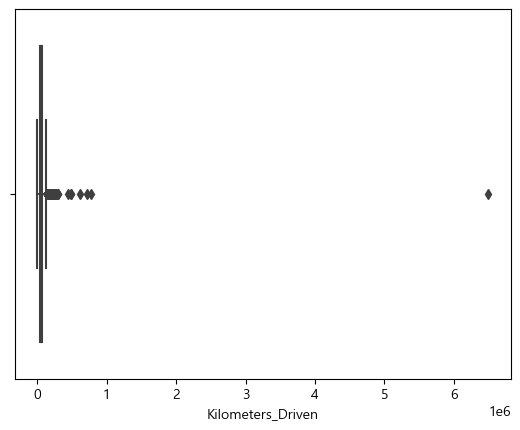

In [34]:
#Kilometers_Driven 최대값은 6,500,000이지만 75%의 데이터는 72,302 이하이다.
#이는 일부 차량이 훨씬 더 많이 운행되었음을 나타내며, 이 값은 아마도 이상치일 가능성이 있어 boxplot으로 먼저 확인
sns.boxplot(x = df_raw['Kilometers_Driven'])

In [35]:
Q1 = df_raw['Kilometers_Driven'].quantile(0.25)
Q3 = df_raw['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1

# IQR 규칙을 사용하여 이상치를 필터링
df_raw = df_raw[~((df_raw['Kilometers_Driven'] < (Q1 - 1.5 * IQR)) | (df_raw['Kilometers_Driven'] > (Q3 + 1.5 * IQR)))]

<Axes: xlabel='Kilometers_Driven'>

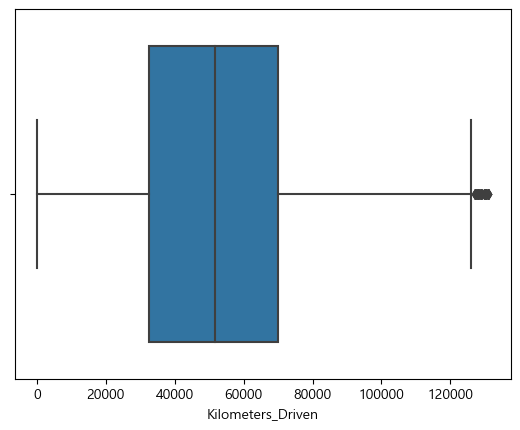

In [36]:
sns.boxplot(x = df_raw['Kilometers_Driven']) #이상치 필터링 후 다시 boxplot 확인

In [37]:
df_raw.describe() #기술통계량 재확인
#Mileage, Seats값이 0인 이상치들이 제거되었고 Kilometers_Driven	최댓값 또한 131000로 변경된 것을 확인할 수 있다.

,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Owner_Type_Num
count,5995.000000,5995.000000,5995.000000,5995.000000,5995.000000,5995.000000,5995.000000,5995.000000,5995.000000,5995.000000
mean,15103.574485,2013.547456,53018.324771,0.490075,1.293578,18.459840,1608.995349,113.412856,5.254045,1.190659
std,17864.228193,3.204030,27077.642990,0.530070,0.455439,4.142404,595.580923,53.949680,0.773917,0.440500
min,7.080000,1998.000000,171.000000,0.000000,1.000000,6.400000,72.000000,34.200000,2.000000,1.000000
25%,5442.010000,2012.000000,32500.000000,0.000000,1.000000,15.600000,1197.000000,77.000000,5.000000,1.000000
50%,8814.520000,2014.000000,51593.000000,0.000000,1.000000,18.400000,1493.000000,98.600000,5.000000,1.000000
75%,16096.080000,2016.000000,70000.000000,1.000000,2.000000,21.100000,1968.000000,138.090000,5.000000,1.000000
max,245273.600000,2019.000000,131000.000000,4.000000,2.000000,33.540000,5998.000000,616.000000,10.000000,4.000000


위 기술통계량에서 Engine 최솟값이 72인 것을 발견하여 이 부분도 이상치로 판단하여 제거하기로 결정했다. </br>
-> 보통 차의 Engine은 1000cc 이상이라고 한다.

In [38]:
df_raw[df_raw['Engine'] == 72.0]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Owner_Type_Num
4446,Mahindra E Verito D4,Chennai,19928.48,2016,50000,4,2,29.3,72.0,41.0,5.0,1


In [39]:
df_raw = df_raw[df_raw['Engine'] != 72.0]

#### 파생변수 추가

1. Brand

In [40]:
len(np.unique(list(df_raw.Name))) #자동차 모델의 종류 갯수 확인 - 1877개 (결측값들이 일부 삭제되어 처음에 비해 수가 변경되었다)

1876

위 결괏값에서 자동차 모델의 수가 너무 많아 Overfitting을 초래할 수도 있다 판단하여 브랜드만 남기고 제거하기로 결정

In [41]:
df_raw['Brand'] = df_raw.Name.apply(lambda x:x.split()[0]) 

In [42]:
#Name 변수는 필요없어졌기에 제거
df_raw = df_raw.drop(['Name'], axis = 1)

2. Vehicle_Age

In [43]:
import datetime
current_year = datetime.datetime.now().year
df_raw['Vehicle_Age'] = current_year - df_raw['Year'] #차량 연식 추가 (현재 년도 - 차량 모델 년도)

In [44]:
# Year 변수는 필요없어졌기에 제거
df_raw = df_raw.drop(['Year'], axis = 1)

3. unique_brands 자동차 등급별 분류

In [45]:
brand_count = df_raw['Brand'].nunique()
print('차 브랜드 개수 : {}'.format(brand_count))

unique_brands = df_raw['Brand'].unique()
print(unique_brands)

차 브랜드 개수 : 30
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'ISUZU' 'Force' 'Bentley' 'Lamborghini']


In [46]:
brand_groups = { #브랜드 등급별로 분류
    'GeneralBrands': ['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Nissan', 'Tata', 'Mitsubishi', 'Renault', 'Mahindra',
                       'Chevrolet', 'Skoda', 'Fiat', 'Jeep', 'Ambassador', 'ISUZU', 'Force', 'Hindustan'], #일반 브랜드
    'PremiumBrands': ['Audi', 'Volkswagen', 'Porsche', 'Mercedes-Benz', 'BMW', 'Jaguar', 'Volvo', 'Land', 'Bentley', 'Lamborghini'], #프리미엄 브랜드
    'CompactBrands': ['Datsun', 'Mini', 'Smart', 'OpelCorsa'] #소형 브랜드
}

df_raw['Brand_Group'] = df_raw['Brand'].map({brand: group for group, brands in brand_groups.items() for brand in brands})

In [47]:
# Brand_Group의 데이터 값을 1, 2, 3으로 변경
# General -> 1, Premium -> 2, Compact -> 3
df_raw['Brand_Group'] = df_raw['Brand_Group'].replace('GeneralBrands', 1)
df_raw['Brand_Group'] = df_raw['Brand_Group'].replace('PremiumBrands', 2)
df_raw['Brand_Group'] = df_raw['Brand_Group'].replace('CompactBrands', 3)

In [48]:
from sklearn.preprocessing import LabelEncoder #Brand 데이터 값 수치형으로 변환

le = LabelEncoder()
df_raw['Brand'] = le.fit_transform(df_raw['Brand'])

brand_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(brand_mapping)

{'Ambassador': 0, 'Audi': 1, 'BMW': 2, 'Bentley': 3, 'Chevrolet': 4, 'Datsun': 5, 'Fiat': 6, 'Force': 7, 'Ford': 8, 'Honda': 9, 'Hyundai': 10, 'ISUZU': 11, 'Jaguar': 12, 'Jeep': 13, 'Lamborghini': 14, 'Land': 15, 'Mahindra': 16, 'Maruti': 17, 'Mercedes-Benz': 18, 'Mini': 19, 'Mitsubishi': 20, 'Nissan': 21, 'Porsche': 22, 'Renault': 23, 'Skoda': 24, 'Smart': 25, 'Tata': 26, 'Toyota': 27, 'Volkswagen': 28, 'Volvo': 29}


4. city_location 지역

In [49]:
df_raw.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [50]:
#지역을 동서남북으로 나누어 city_location 파생변수 생성
east = ['Kolkata'] 
west = ['Mumbai', 'Pune', 'Ahmedabad']
south = ['Chennai', 'Coimbatore', 'Kochi', 'Hyderabad', 'Bangalore']
north = ['Jaipur', 'Delhi']

def city2ewsn(city):
    if city in east:
        return 'east'
    elif city in west:
        return 'west'
    elif city in south:
        return 'south'
    elif city in north:
        return 'north'
    
df_raw['city_location'] = df_raw.Location.apply(city2ewsn)

In [51]:
# Location 변수는 필요없어졌기에 제거
df_raw = df_raw.drop(['Location'], axis = 1)

In [52]:
# city_location의 데이터 값을 1, 2, 3, 4으로 변경
# 동부 -> 1, 서부 -> 2, 남부 -> 3, 북부 -> 4
df_raw['city_location'] = df_raw['city_location'].replace('east', 1)
df_raw['city_location'] = df_raw['city_location'].replace('west', 2)
df_raw['city_location'] = df_raw['city_location'].replace('south', 3)
df_raw['city_location'] = df_raw['city_location'].replace('north', 4)

In [53]:
df_raw.isnull().sum() #결측값 재확인

Price                  0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Mileage                0
Engine                 0
Power                  0
Seats                  0
Owner_Type_Num         0
Brand                  0
Vehicle_Age            0
Brand_Group          289
city_location          0
dtype: int64

In [54]:
mode_value = df_raw['Brand_Group'].mode()[0] #Brand_Group 결측값을 최빈값으로 대체

df_raw['Brand_Group'].fillna(mode_value, inplace=True)

In [55]:
df_raw.isnull().sum() #결측값 최종 재확인

Price                0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Mileage              0
Engine               0
Power                0
Seats                0
Owner_Type_Num       0
Brand                0
Vehicle_Age          0
Brand_Group          0
city_location        0
dtype: int64

In [56]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5994 entries, 0 to 7236
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              5994 non-null   float64
 1   Kilometers_Driven  5994 non-null   int64  
 2   Fuel_Type          5994 non-null   int64  
 3   Transmission       5994 non-null   int64  
 4   Mileage            5994 non-null   float64
 5   Engine             5994 non-null   float64
 6   Power              5994 non-null   float64
 7   Seats              5994 non-null   float64
 8   Owner_Type_Num     5994 non-null   int64  
 9   Brand              5994 non-null   int32  
 10  Vehicle_Age        5994 non-null   int64  
 11  Brand_Group        5994 non-null   float64
 12  city_location      5994 non-null   int64  
dtypes: float64(6), int32(1), int64(6)
memory usage: 632.2 KB


In [57]:
df_raw.shape

(5994, 13)

#### 그래프로 이상치 확인

Text(0.5, 1.0, 'Brand_Group')

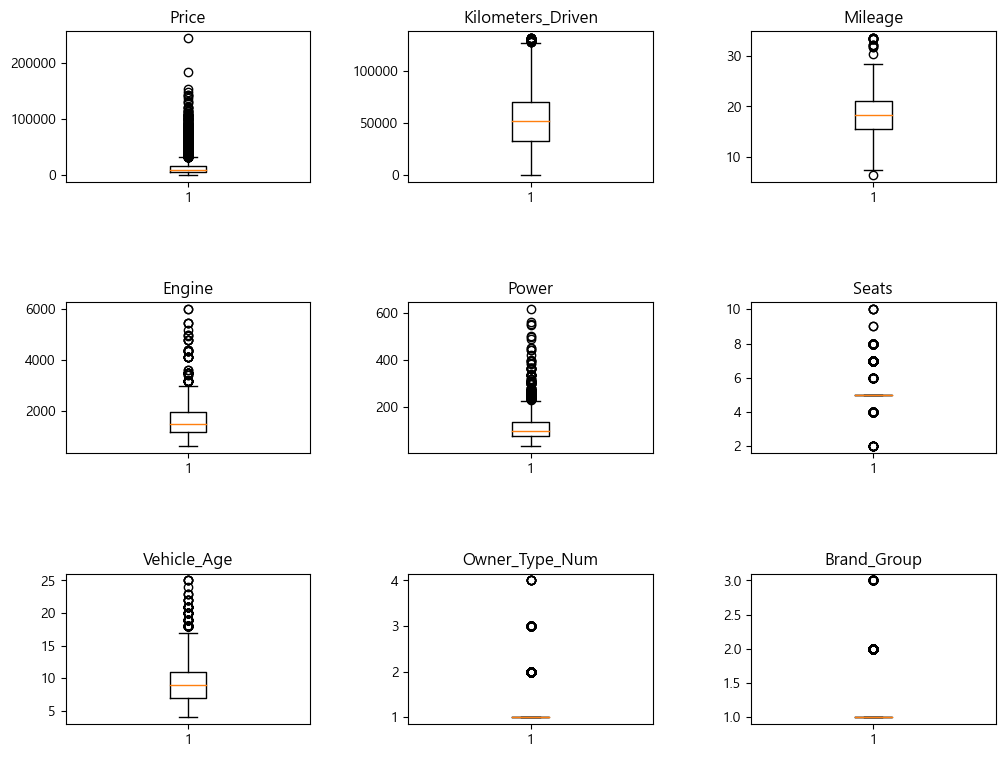

In [58]:
#이상치 확인을 위한 box-plot
fig, axs = plt.subplots(3, 3, figsize=(12, 9))
axs = axs.flatten()

fig.subplots_adjust(wspace=0.4, hspace=0.8)

axs[0].boxplot(df_raw['Price'])
axs[0].set_title('Price')

axs[1].boxplot(df_raw['Kilometers_Driven'])
axs[1].set_title('Kilometers_Driven')

axs[2].boxplot(df_raw['Mileage'])
axs[2].set_title('Mileage')

axs[3].boxplot(df_raw['Engine'])
axs[3].set_title('Engine')

axs[4].boxplot(df_raw['Power'])
axs[4].set_title('Power')

axs[5].boxplot(df_raw['Seats'])
axs[5].set_title('Seats')

axs[6].boxplot(df_raw['Vehicle_Age'])
axs[6].set_title('Vehicle_Age')

axs[7].boxplot(df_raw['Owner_Type_Num'])
axs[7].set_title('Owner_Type_Num')

axs[8].boxplot(df_raw['Brand_Group'])
axs[8].set_title('Brand_Group')


위 boxplot에서 목표변수 price에 이상치가 많이 관측되어
목표변수 Price의 분포도를 파악하기 위해 Price의 히스토그램을 그려보기로 결정

(array([2.695e+03, 1.823e+03, 4.940e+02, 2.910e+02, 2.020e+02, 1.520e+02,
        1.020e+02, 6.100e+01, 5.600e+01, 3.300e+01, 2.300e+01, 1.800e+01,
        1.400e+01, 1.100e+01, 8.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([7.08000000e+00, 8.18263067e+03, 1.63581813e+04, 2.45337320e+04,
        3.27092827e+04, 4.08848333e+04, 4.90603840e+04, 5.72359347e+04,
        6.54114853e+04, 7.35870360e+04, 8.17625867e+04, 8.99381373e+04,
        9.81136880e+04, 1.06289239e+05, 1.14464789e+05, 1.22640340e+05,
        1.30815891e+05, 1.38991441e+05, 1.47166992e+05, 1.55342543e+05,
        1.63518093e+05, 1.71693644e+05, 1.79869195e+05, 1.88044745e+05,
        1.96220296e+05, 2.04395847e+05, 2.12571397e+05, 2.20746948e+05,
        2.28922499e+05, 2.37098049e+05, 2.45273600e+05]),
 <BarContainer object of 30 artists>)

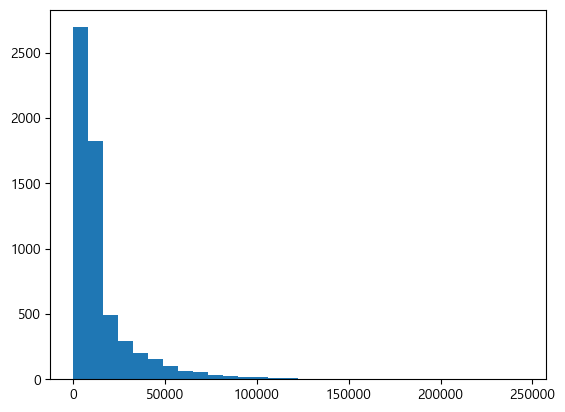

In [59]:
plt.hist(df_raw['Price'],bins = 30)

위 그림에서 price가 정규성을 띄지않는다 판단하여 목표 변수에 로그 변환을 적용하여 데이터의 분포를 조정하기로 했다. </br>
로그 변환은 비대칭 분포를 보다 정규 분포에 가깝게 만들어줄 수 있다.

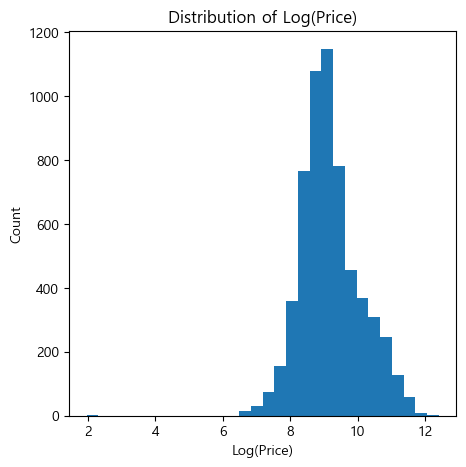

In [60]:
# 로그 변환 적용
df_raw['Price_log'] = np.log(df_raw['Price'])

# 히스토그램 그리기
plt.figure(figsize=(5, 5))
plt.hist(df_raw['Price_log'], bins=30)
plt.xlabel('Log(Price)')
plt.ylabel('Count')
plt.title('Distribution of Log(Price)')
plt.show()

In [61]:
df_raw.drop('Price', axis=1, inplace=True) #기존 Price열 삭제

마찬가지로 차량 가격에 큰 요인일거라 생각하는 Power도 히스토그램을 그려보았다.

(array([1.980e+02, 7.880e+02, 1.917e+03, 7.450e+02, 7.620e+02, 3.870e+02,
        2.070e+02, 4.990e+02, 2.040e+02, 4.400e+01, 8.000e+01, 7.600e+01,
        2.600e+01, 6.000e+00, 1.900e+01, 1.000e+01, 4.000e+00, 5.000e+00,
        5.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 34.2       ,  53.59333333,  72.98666667,  92.38      ,
        111.77333333, 131.16666667, 150.56      , 169.95333333,
        189.34666667, 208.74      , 228.13333333, 247.52666667,
        266.92      , 286.31333333, 305.70666667, 325.1       ,
        344.49333333, 363.88666667, 383.28      , 402.67333333,
        422.06666667, 441.46      , 460.85333333, 480.24666667,
        499.64      , 519.03333333, 538.42666667, 557.82      ,
        577.21333333, 596.60666667, 616.        ]),
 <BarContainer object of 30 artists>)

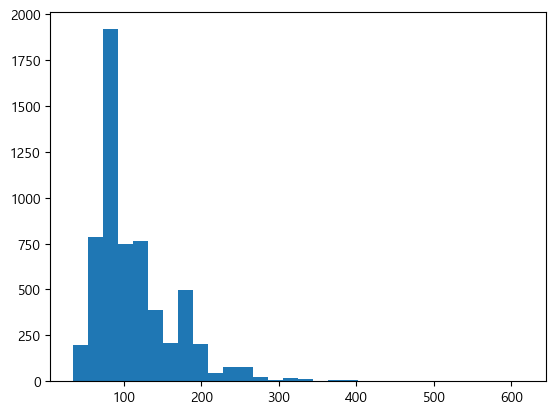

In [62]:
plt.hist(df_raw['Power'],bins = 30)

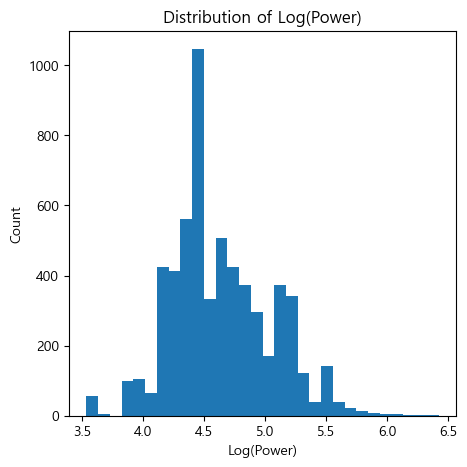

In [63]:
# 로그 변환 적용
df_raw['Power_log'] = np.log(df_raw['Power'])

# 히스토그램 그리기
plt.figure(figsize=(5, 5))
plt.hist(df_raw['Power_log'], bins=30)
plt.xlabel('Log(Power)')
plt.ylabel('Count')
plt.title('Distribution of Log(Power)')
plt.show()

이전보다 훨씬 더 정규성을 띈다고 생각하여, Power_log 값을 사용하기로 했다.

In [64]:
df_raw.drop('Power', axis=1, inplace=True)

Text(0.5, 1.0, 'Brand_Group')

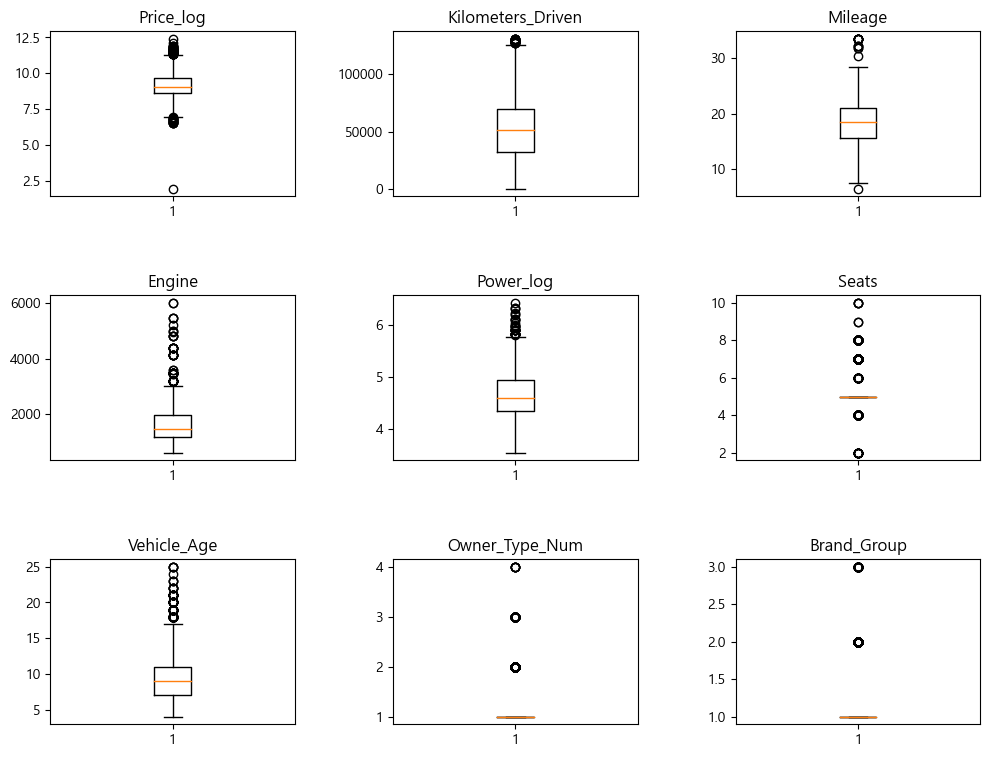

In [65]:
#box-plot 재시각화
fig, axs = plt.subplots(3, 3, figsize=(12, 9))
axs = axs.flatten()

fig.subplots_adjust(wspace=0.4, hspace=0.6)

axs[0].boxplot(df_raw['Price_log'])
axs[0].set_title('Price_log')

axs[1].boxplot(df_raw['Kilometers_Driven'])
axs[1].set_title('Kilometers_Driven')

axs[2].boxplot(df_raw['Mileage'])
axs[2].set_title('Mileage')

axs[3].boxplot(df_raw['Engine'])
axs[3].set_title('Engine')

axs[4].boxplot(df_raw['Power_log'])
axs[4].set_title('Power_log')

axs[5].boxplot(df_raw['Seats'])
axs[5].set_title('Seats')

axs[6].boxplot(df_raw['Vehicle_Age'])
axs[6].set_title('Vehicle_Age')

axs[7].boxplot(df_raw['Owner_Type_Num'])
axs[7].set_title('Owner_Type_Num')

axs[8].boxplot(df_raw['Brand_Group'])
axs[8].set_title('Brand_Group')


Price_log에서 최솟값 이상치가 발견된듯 하여, 처리해주기로 했다.

In [66]:
Q1 = df_raw['Price_log'].quantile(0.25)
Q3 = df_raw['Price_log'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

df_raw = df_raw[df_raw['Price_log'] >= lower_bound]

# Q1 = df_raw['Price_log'].quantile(0.25)
# Q3 = df_raw['Price_log'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df_raw = df_raw[(df_raw['Price_log'] >= lower_bound) & (df_raw['Price_log'] <= upper_bound)]

Text(0.5, 1.0, 'Brand_Group')

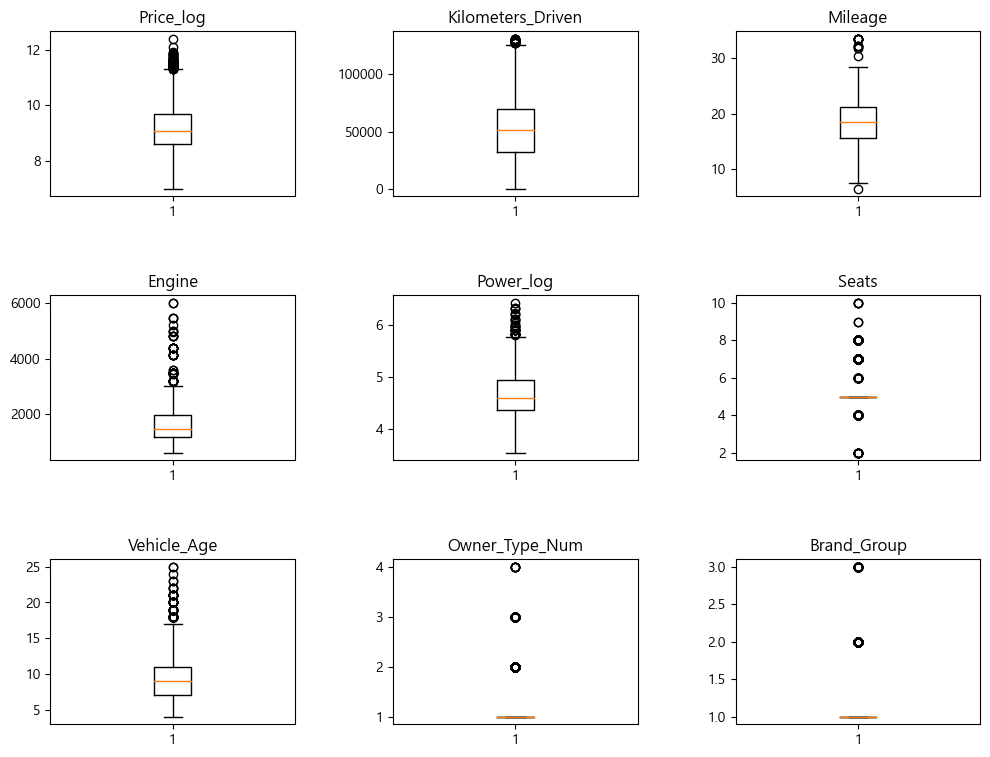

In [67]:
#box-plot 재시각화
fig, axs = plt.subplots(3, 3, figsize=(12, 9))
axs = axs.flatten()

fig.subplots_adjust(wspace=0.4, hspace=0.6)

axs[0].boxplot(df_raw['Price_log'])
axs[0].set_title('Price_log')

axs[1].boxplot(df_raw['Kilometers_Driven'])
axs[1].set_title('Kilometers_Driven')

axs[2].boxplot(df_raw['Mileage'])
axs[2].set_title('Mileage')

axs[3].boxplot(df_raw['Engine'])
axs[3].set_title('Engine')

axs[4].boxplot(df_raw['Power_log'])
axs[4].set_title('Power_log')

axs[5].boxplot(df_raw['Seats'])
axs[5].set_title('Seats')

axs[6].boxplot(df_raw['Vehicle_Age'])
axs[6].set_title('Vehicle_Age')

axs[7].boxplot(df_raw['Owner_Type_Num'])
axs[7].set_title('Owner_Type_Num')

axs[8].boxplot(df_raw['Brand_Group'])
axs[8].set_title('Brand_Group')


목표변수(Price_log)와 설명변수간의 관계파악을 위해 산점도를 그려보았다.

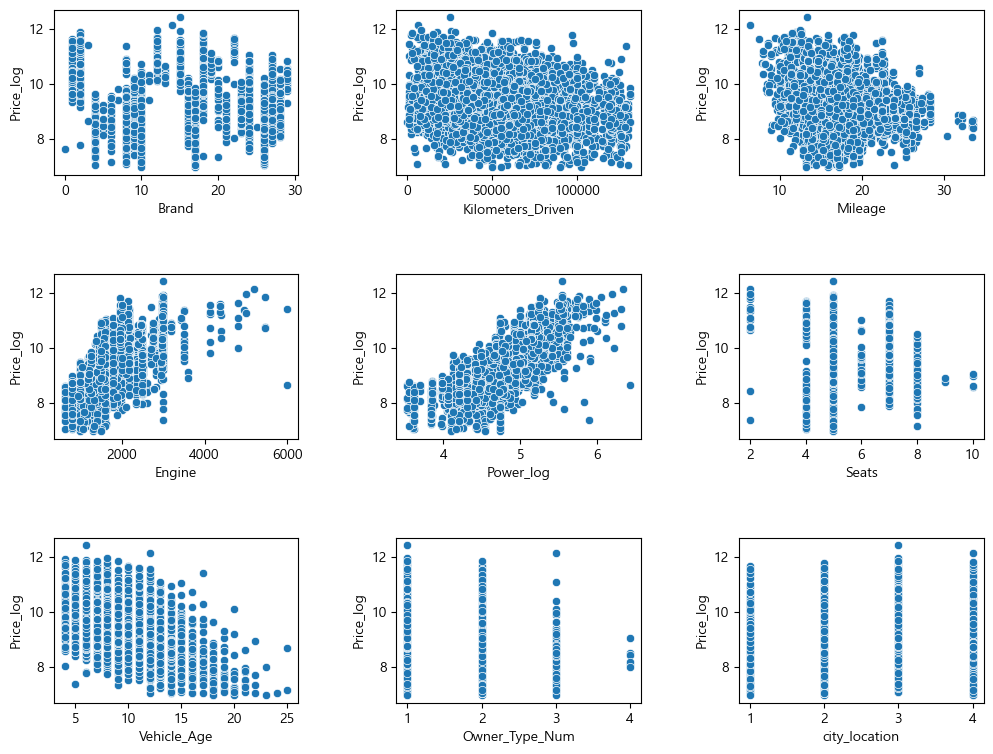

In [68]:
fig, axs = plt.subplots(3, 3, figsize=(12, 9))
axs = axs.flatten()

sns.scatterplot(data=df_raw, x='Brand', y='Price_log', ax=axs[0])
sns.scatterplot(data=df_raw, x='Kilometers_Driven', y='Price_log', ax=axs[1])
sns.scatterplot(data=df_raw, x='Mileage', y='Price_log', ax=axs[2])
sns.scatterplot(data=df_raw, x='Engine', y='Price_log', ax=axs[3])
sns.scatterplot(data=df_raw, x='Power_log', y='Price_log', ax=axs[4])
sns.scatterplot(data=df_raw, x='Seats', y='Price_log', ax=axs[5])
sns.scatterplot(data=df_raw, x='Vehicle_Age', y='Price_log', ax=axs[6])
sns.scatterplot(data=df_raw, x='Owner_Type_Num', y='Price_log', ax=axs[7])
sns.scatterplot(data=df_raw, x='city_location', y='Price_log', ax=axs[8])

fig.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

위 산점도를 통해 목표변수 Price_log와 설명변수간의 관계를 볼 수 있다. </br>
1. Engine이 증가할수록 Price_log또한 증가하는 경향이 보인다. 즉, 큰 배기량을 가진 차량은 가격이 더 높을 수 있다고 판단된다. (양의 선형 관계)</br>
2. Power_log가 증가할수록 Price_log가 증가하는 경향이 보인다. 즉, 높은 출력을 가진 차량은 가격이 높을 수 있다고 판단된다. (양의 선형 관계)</br>
3. Vehicle_Age가 증가할수록 Price_log가 감소하는 경향이 보인다. 즉, 차량의 연식이 오래될수록 가격이 낮아질 수 있다고 판단된다. (약한 음의 선형관계)</br>
4. 좌석 수(Seats)와 Owner_Type_Num, city_location(지역)은 Price_log는 큰 상관 관계를 보이지 않는 것으로 보인다.

#### 탐색적 분석

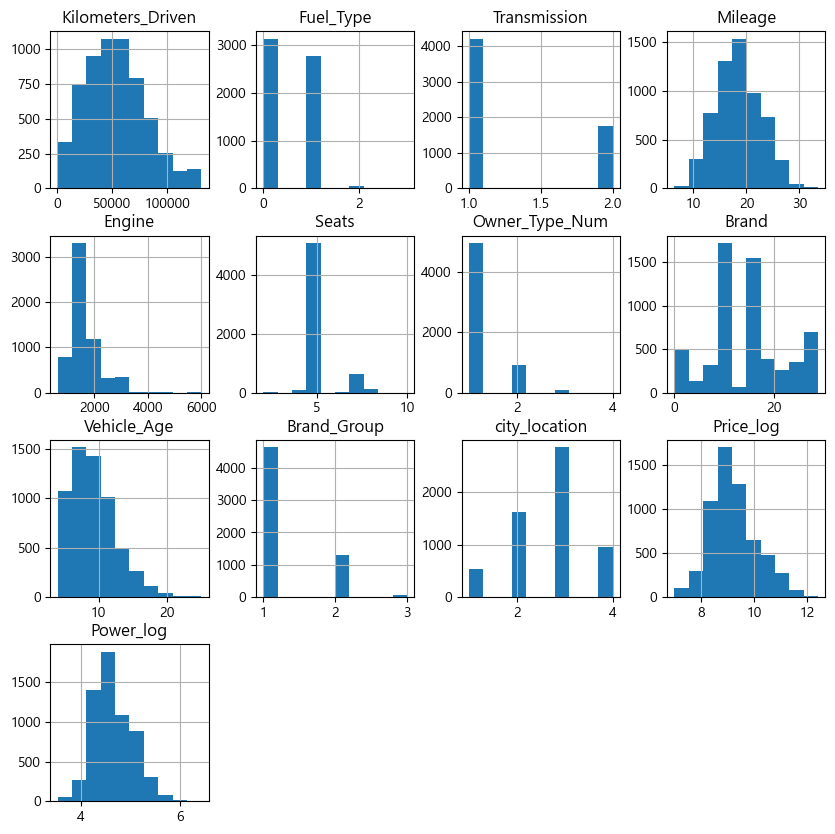

In [69]:
df_raw.hist(figsize = (10, 10)) #히스토그램 - 데이터의 전반적인 분포를 파악
fig.subplots_adjust(wspace=0.4, hspace=0.8)

각 인자별로 상관관계 시각화

<Axes: >

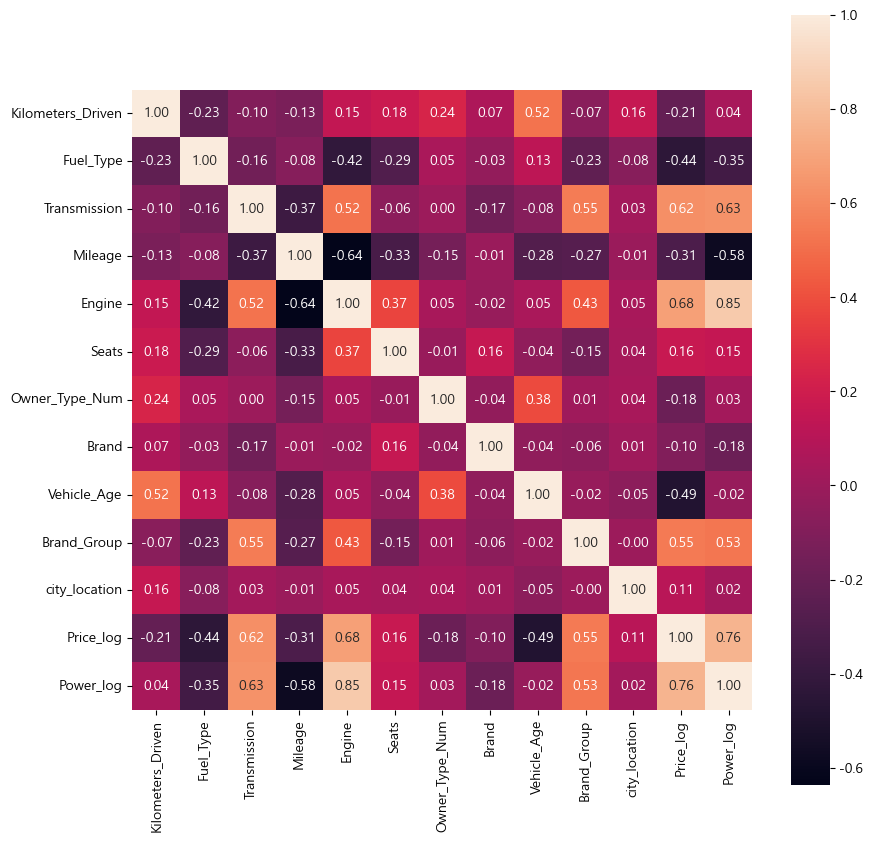

In [70]:
df_raw = df_raw.select_dtypes(include=np.number) #df_raw에서 수치형 열만 선택
plt.figure(figsize=(10, 10))
sns.heatmap(df_raw.corr(), annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
#annot=True는 히트맵 셀에 상관계수 값을 표시, square=True는 히트맵 셀을 정사각형 모양으로 표시하도록 지정, annot_kws={'size': 10}는 상관계수 값의 텍스트 크기를 10으로 지정

히트맵에서 각 셀의 색상은 해당 데이터 포인트 간의 상관관계를 나타낸다. -> 짙은 색일수록 더 강한 상관관계를 의미 </br>
상관계수는 -1에서 1 사이의 값을 가지며, -1은 완전히 음의 상관관계, 1은 완전히 양의 상관관계를 의미, 0은 상관관계가 없음을 의미한다.</br>
밝은 색상과 높은 숫자는 두 변수 간의 강한 양의 상관관계를 나타내며, 어두운 색상과 낮은 숫자는 두 변수 간의 약한 상관관계나 상관관계가 없음을 의미한다. </br>

위 히트맵을 토대로 Price_log와 Transmission, Engine, Brand_Group, Power_log는 양의 상관관계를 </br>
Price_log와 Vegicle_Age은 약한 상관관계를 보이는것으로 파악이 된다.

위의 종합적인 내용을 바탕으로 다음과 같이 추측할 수 있다. </br>
1. 엔진 용량이 증가할수록 가격도 증가할 수 있다.</br>
2. 주행 거리가 증가할수록 가격이 감소할 수 있다. (주행 거리가 높을수록 차량의 사용과 마모가 더 많아지기 때문에 가격이 하락)</br>
3. 차량의 출력(마력)이 가격에 큰 영향을 미칠 가능성이 있다. (즉, 출력이 높을수록 가격도 높아질 수 있다.)

In [71]:
df_raw.corr().round(3) #상관계수

,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Seats,Owner_Type_Num,Brand,Vehicle_Age,Brand_Group,city_location,Price_log,Power_log
Kilometers_Driven,1.000,-0.230,-0.097,-0.127,0.145,0.179,0.238,0.067,0.516,-0.070,0.163,-0.212,0.042
Fuel_Type,-0.230,1.000,-0.159,-0.082,-0.418,-0.288,0.051,-0.031,0.130,-0.230,-0.079,-0.438,-0.348
Transmission,-0.097,-0.159,1.000,-0.373,0.516,-0.058,0.002,-0.165,-0.085,0.551,0.027,0.619,0.632
Mileage,-0.127,-0.082,-0.373,1.000,-0.635,-0.327,-0.147,-0.008,-0.280,-0.267,-0.006,-0.307,-0.580
Engine,0.145,-0.418,0.516,-0.635,1.000,0.367,0.048,-0.021,0.049,0.427,0.047,0.684,0.855
Seats,0.179,-0.288,-0.058,-0.327,0.367,1.000,-0.013,0.158,-0.043,-0.155,0.039,0.165,0.152
Owner_Type_Num,0.238,0.051,0.002,-0.147,0.048,-0.013,1.000,-0.040,0.384,0.013,0.044,-0.184,0.026
Brand,0.067,-0.031,-0.165,-0.008,-0.021,0.158,-0.040,1.000,-0.042,-0.056,0.012,-0.105,-0.183
Vehicle_Age,0.516,0.130,-0.085,-0.280,0.049,-0.043,0.384,-0.042,1.000,-0.018,-0.054,-0.487,-0.016
Brand_Group,-0.070,-0.230,0.551,-0.267,0.427,-0.155,0.013,-0.056,-0.018,1.000,-0.003,0.546,0.532


#### 다중회귀분석 (연속형 변수 vs 연속형 변수)

In [72]:
from scipy.stats import shapiro

# 정규성 검정 수행
stat, p = shapiro(df_raw['Price_log'])
print('Shapiro-Wilk test 결과 - Statistic: {}, p-value: {}'.format(stat, p))

Shapiro-Wilk test 결과 - Statistic: 0.9784740209579468, p-value: 3.8270406703223964e-29


목표변수에 대해 정규성 검정을 해보자.</br>
하지만, 결과는 log변환을 했음에도 불구하고 Price_log가 완벽한 정규 분포를 따르지 않는 결과가 나왔다.</br>
그러나, Statistic 값이 1에 가깝게 나타나므로 데이터가 어느 정도 정규성을 가지고 있다고 생각이든다.</br>

In [73]:
#train_test_split (train - test비율 7:3으로 나눔)
df_train, df_test = train_test_split(df_raw, 
                                    test_size = 0.3, 
                                    random_state = 1234) 
print('train data size : {}'.format(df_train.shape)) 
print('test data size : {}'.format(df_test.shape))

train data size : (4182, 13)
test data size : (1793, 13)


처음 받은 7253건의 데이터에 비해 5975개로 약 1300개정도의 데이터가 줄어든 것이 확인이 된다. </br>
-> 아무래도 New_Price의 결측치가 많아 해당 데이터를 삭제했기때문이라고 생각이 든다.

In [74]:
reg_model = smf.ols(formula ='Price_log ~ Power_log + Kilometers_Driven + Mileage + Engine \
                     + Vehicle_Age + Power_log', data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     4196.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        20:04:27   Log-Likelihood:                -1590.7
No. Observations:                4182   AIC:                             3193.
Df Residuals:                    4176   BIC:                             3231.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.0840      0.11

위 OLS 회귀분석 결과에 따르면, 종속 변수인 Price_log와 독립 변수들 간에는 통계적으로 유의한 관계가 있음을 나타낸다. </br>
R-squared 값은 83.4%로, Adjusted R-squared 값도 83.4%로, 모델의 설명력을 보다 정확하게 조정한 값으로 나타내는 것을 볼 수있다.</br>

다음으로 독립 변수의 계수(coef)를 살펴보면, </br>
Power_log의 계수는 1.1878로 양의 값이며, 이는 차량의 엔진 파워가 증가할수록 가격이 증가한다는 것을 의미한다.</br>
이는 위에 히트맵을 통해 확인했던 결과와 일치함을 알 수있다.</br>

마지막으로, P>|t| 값은 해당 독립 변수의 유의성을 나타내며,</br>
0.05보다 작은 경우 해당 독립 변수가 종속 변수에 대해 통계적으로 유의미한 영향을 미친다고 할 수 있다.</br>

VIF - 설명변수 간 다중공선성 평가

In [75]:
# 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop(['Kilometers_Driven'], axis=1) #min - max차이가 많이나서 제외하기로 결정

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values('VIF', ascending = True).round(2)

,variable,VIF
10,city_location,1.04
7,Brand,1.16
6,Owner_Type_Num,1.20
5,Seats,1.72
1,Fuel_Type,1.85
9,Brand_Group,1.90
2,Transmission,2.13
3,Mileage,2.81
8,Vehicle_Age,3.12
4,Engine,6.10


위 결괏값을 살펴보면 VIF 값이 1에 가까울수록 다중공선성의 문제가 거의 없고, 10을 넘으면 다중공선성 문제가 있다고 판단할 수 있다. </br>
따라서, 회귀 모델의 독립 변수들 간에는 상대적으로 적은 상관관계가 존재하는 것으로 해석할 수 있다.

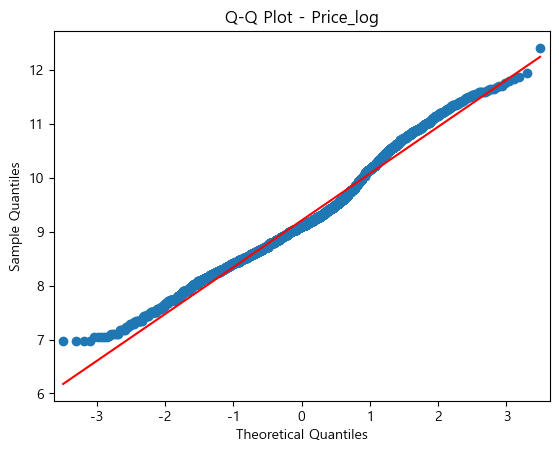

In [76]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Power_log 변수에 대한 Q-Q Plot
sm.qqplot(df_train['Price_log'], line='s')
plt.title('Q-Q Plot - Price_log')
plt.show()

위는 Price_log 변수에 대한 Q-Q Plot을 그려보았다. </br>
Q-Q Plot은 분포의 정규성을 확인하기 위한 그래프로, 주어진 데이터가 정규분포를 따르는지 시각적으로 확인할 수 있다.</br>
위에서 주어진 데이터는 완벽한 정규성을 띄진 않는다는 결론이 도출되었지만, Q-Q Plot을 통해 어느정도 정규성을 띄고있다고 생각이 든다.

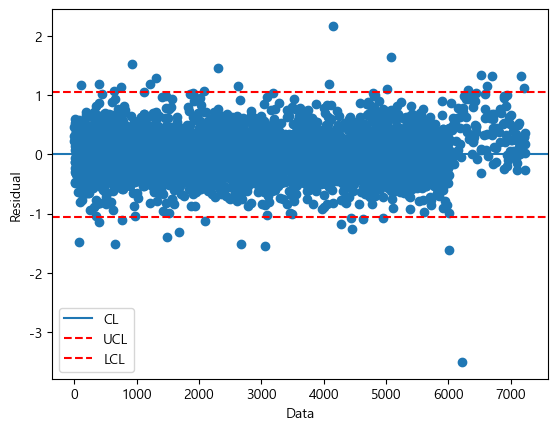

In [77]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data") ; plt.ylabel('Residual')
plt.axhline(y = 0, linestyle='-', label = 'CL')
plt.axhline(y = 3*np.std(reg_result.resid),linestyle = '--', color = 'red', label='UCL')
plt.axhline(y = -3*np.std(reg_result.resid),linestyle = 'dashed', color = 'red', label='LCL')
plt.legend()
plt.show()

다음으로 잔차(residual)를 시각화하기 위해 산점도와 제어선을 그려보았다. </br>
잔차는 회귀 분석 모델의 예측값과 실제 관측값 간의 차이를 나타내며, 잔차의 분포를 확인하여 모델의 적합도를 평가할 수 있다고 한다.</br>
대체적으로 중심선을 기준으로 상/하한선을 크게 벗어나지 않는다고 생각이 든다.

In [78]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print('train data 의 결정계수:', r2_score(df_train['Price_log'],train_pred))
print('test data의 결정계수:', r2_score(df_test['Price_log'], test_pred))

train data 의 결정계수: 0.8339959032237154
test data의 결정계수: 0.8058151132790715


결론적으로 회귀 모델의 예측값과 실제값 간의 결정계수(R-squared)는 아래와 같다. </br>
훈련 데이터의 결정계수는 약 83.39%이고, 테스트 데이터의 결정계수는 약 80.58%이다. </br>
이는 회귀 모델이 훈련 데이터와 테스트 데이터 모두에 대해 약 87%에서 88%의 변동을 설명할 수 있음을 의미한다.

#### 연속형 변수 vs. 연속형 변수 : 상관분석

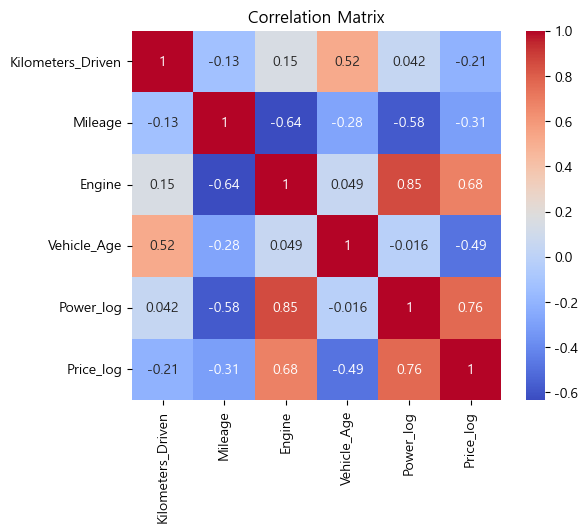

Correlation with Price_log:
Kilometers_Driven   -0.212006
Mileage             -0.307161
Engine               0.683828
Vehicle_Age         -0.487055
Power_log            0.764671
Price_log            1.000000
Name: Price_log, dtype: float64


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 분석
variables = ['Kilometers_Driven', 'Mileage', 'Engine', 'Vehicle_Age', 'Power_log']

# 변수들 간의 상관 계수 행렬 계산
corr_matrix = df_raw[variables + ['Price_log']].corr()

# Heatmap으로 상관 계수 행렬 시각화
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Price_log과 각 변수들 간의 상관 계수
print('Correlation with Price_log:')
print(corr_matrix['Price_log'])

위의 상관 계수 결과는 다음과 같다.

1. Kilometers_Driven과 Price_log 간의 상관 계수는 -0.212 </br>
이는 두 변수 간에 약한 음의 상관 관계가 있음을 나타낸다. 즉, 주행 거리가 증가할수록 가격 로그가 약간 감소하는 경향이 있을 수 있다.

2. Mileage와 Price_log 간의 상관 계수는 약 -0.307</br>
이는 두 변수 간에 약한 음의 상관 관계가 있음을 나타낸다. 즉, 연비가 높을수록 가격 로그가 약간 증가하는 경향이 있을 수 있다.

3. Engine과 Price_log 간의 상관 계수는 약 0.684</br>
이는 두 변수 간에 강한 양의 상관 관계가 있음을 나타낸다. 즉, 엔진 용량이 증가할수록 가격 로그가 증가하는 경향이 있을 수 있다

4. Vehicle_Age와 Price_log 간의 상관 계수는 약 -0.487</br>
이는 두 변수 간에 중간 정도의 음의 상관 관계가 있음을 나타낸다. 즉, 차량 연식이 증가할수록 가격 로그가 감소하는 경향이 있을 수 있다

5. Power_log와 Price_log 간의 상관 계수는 약 0.765</br>
이는 두 변수 간에 강한 양의 상관 관계가 있음을 나타낸다. 즉, 차량의 파워 로그가 증가할수록 가격 로그도 증가하는 경향이 있을 수 있다.

#### 범주형 변수 vs. 범주형 변수 : 카이제곱 검정

In [80]:
from scipy.stats import chi2_contingency

# 범주형 변수 선택
categorical_variables = ['Fuel_Type', 'Transmission', 'Seats', 'Owner_Type_Num', 'Brand', 'Brand_Group', 'city_location']

# 각 변수와 Price_log 간의 독립성을 평가하는 카이제곱 검정 수행
for var in categorical_variables:
    contingency_table = pd.crosstab(df_raw[var], df_raw['Price_log'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    print(f'Chi-square test for {var}:')
    print('Chi-square statistic:', chi2)
    print('p-value:', p_value)
    print()

Chi-square test for Fuel_Type:
Chi-square statistic: 4028.5238892834986
p-value: 0.9993176348442769

Chi-square test for Transmission:
Chi-square statistic: 3599.8707817459153
p-value: 3.0978557004309686e-185

Chi-square test for Seats:
Chi-square statistic: 12284.215728543317
p-value: 4.348586842280238e-48

Chi-square test for Owner_Type_Num:
Chi-square statistic: 2983.5621691382194
p-value: 1.0

Chi-square test for Brand:
Chi-square statistic: 61045.462571919845
p-value: 0.0

Chi-square test for Brand_Group:
Chi-square statistic: 5343.348339225534
p-value: 5.0786953884401586e-151

Chi-square test for city_location:
Chi-square statistic: 3823.0489469306594
p-value: 0.9999999864389475



위의 카이제곱 검정은 다음과 같다.

1. Fuel_Type: 검정 결과, 카이제곱 통계량은 4028.52이고 p-value는 0.9993</br>
따라서, 유의 수준에서 Fuel_Type과 Price_log 간의 독립성을 기각할 수 없다.</br>
즉, Fuel_Type과 Price_log 간에는 통계적으로 유의한 관련성이 없다고 할 수 있다.</br>

2. Transmission: 카이제곱 통계량은 3599.87이고 p-value는 매우 작은 값인 3.10e-185</br>
이로부터, Transmission과 Price_log 간에는 통계적으로 유의한 관련성이 있음을 알 수 있다.</br>
즉, Transmission 유형에 따라 Price_log의 분포가 다르다고 할 수 있다.</br>

3. Seats: 카이제곱 통계량은 12284.22이고 p-value는 매우 작은 값인 4.35e-48</br>
따라서, Seats와 Price_log 간에는 통계적으로 유의한 관련성이 있음을 알 수 있다.</br>
즉, 좌석 수에 따라 Price_log의 분포가 다르다고 할 수 있다.</br>

4. Owner_Type_Num: 카이제곱 통계량은 2983.56이고 p-value는 1.0</br>
따라서, Owner_Type_Num과 Price_log 간에는 통계적으로 유의한 관련성이 없다고 할 수 있다.</br>

5. Brand: 카이제곱 통계량은 61045.46이고 p-value는 0.0</br>
이로부터, Brand와 Price_log 간에는 통계적으로 유의한 관련성이 있음을 알 수 있다.</br>
즉, 브랜드에 따라 Price_log의 분포가 다르다고 할 수 있다.</br>

6. Brand_Group: 카이제곱 통계량은 5343.35이고 p-value는 매우 작은 값인 5.08e-151</br>
따라서, Brand_Group과 Price_log 간에는 통계적으로 유의한 관련성이 있음을 알 수 있다.</br>
즉, 브랜드 그룹에 따라 Price_log의 분포가 다르다고 할 수 있다.

7. city_location: 카이제곱 통계량은 3823.05이고 p-value는 0.9999</br>
따라서, 유의 수준에서 city_location과 Price_log 간의 독립성을 기각할 수 없다.</br>
즉, city_location과 Price_log 간에는 통계적으로 유의한 관련성이 없다고 할 수 있다.

#### 범주형 변수 vs. 연속형 변수 : 아노바(ANOVA)

In [81]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 범주형 변수 선택
categorical_variables = ['Fuel_Type', 'Transmission', 'Seats', 'Owner_Type_Num', 'Brand', 'Brand_Group', 'city_location']

# 각 범주형 변수와 Price_log 간의 ANOVA 검정 수행
for var in categorical_variables:
    formula = f'Price_log ~ C({var})'  # ANOVA 모델 formula 생성
    model = ols(formula, data=df_raw).fit()  # ANOVA 모델 피팅
    anova_table = sm.stats.anova_lm(model)  # ANOVA 결과 테이블 생성
    
    print(f'ANOVA test for {var}:')
    print(anova_table)
    print()

ANOVA test for Fuel_Type:
                  df       sum_sq     mean_sq           F         PR(>F)
C(Fuel_Type)     3.0   885.399631  295.133210  484.106004  1.425783e-281
Residual      5971.0  3640.195293    0.609646         NaN            NaN

ANOVA test for Transmission:
                     df       sum_sq      mean_sq            F  PR(>F)
C(Transmission)     1.0  1735.298702  1735.298702  3714.637561     0.0
Residual         5973.0  2790.296221     0.467152          NaN     NaN

ANOVA test for Seats:
              df       sum_sq    mean_sq         F         PR(>F)
C(Seats)     7.0   364.783002  52.111857  74.73336  3.510395e-104
Residual  5967.0  4160.811921   0.697304       NaN            NaN

ANOVA test for Owner_Type_Num:
                       df       sum_sq    mean_sq          F        PR(>F)
C(Owner_Type_Num)     3.0   155.907802  51.969267  71.013893  4.030832e-45
Residual           5971.0  4369.687121   0.731818        NaN           NaN

ANOVA test for Brand:
           

위의 아노바검정 결과는 다음과 같다. </br>

1. Fuel_Type: 검정 결과, 카이제곱 통계량은 484.11이고 p-value는 1.43e-281</br>
이로부터, Fuel_Type과 Price_log 간에는 통계적으로 유의한 차이가 있음을 알 수 있다.</br>
즉, 연료 타입에 따라 Price_log의 평균이 다르다고 할 수 있다.</br>

2. Transmission: 카이제곱 통계량은 3714.64이고 p-value는 0.0</br>
따라서, Transmission과 Price_log 간에는 통계적으로 유의한 차이가 있음을 알 수 있다.</br>
즉, 변속기 유형에 따라 Price_log의 평균이 다르다고 할 수 있다.</br>

3. Seats: 카이제곱 통계량은 74.73이고 p-value는 3.51e-104</br>
이로부터, Seats와 Price_log 간에는 통계적으로 유의한 차이가 있음을 알 수 있다.</br>
즉, 좌석 수에 따라 Price_log의 평균이 다르다고 할 수 있다.</br>

4. Owner_Type_Num: 카이제곱 통계량은 71.01이고 p-value는 4.03e-45</br>
따라서, Owner_Type_Num과 Price_log 간에는 통계적으로 유의한 차이가 있음을 알 수 있다.</br>
즉, 소유자 유형에 따라 Price_log의 평균이 다르다고 할 수 있다.</br>

5. Brand: 카이제곱 통계량은 262.37이고 p-value는 0.0</br>
이로부터, 브랜드와 Price_log 간에는 통계적으로 유의한 차이가 있음을 알 수 있다.</br>
즉, 브랜드에 따라 Price_log의 평균이 다르다고 할 수 있다.</br>

6. Brand_Group: 카이제곱 통계량은 397.84이고 p-value는 1.42e-87</br>
이로부터, 브랜드 그룹과 Price_log 간에는 통계적으로 유의한 차이가 있음을 알 수 있다.</br>
즉, 브랜드 그룹에 따라 Price_log의 평균이 다르다고 할 수 있다.</br>

7. city_location: 카이제곱 통계량은 95.97이고 p-value는 1.16e-60</br>
따라서, city_location과 Price_log 간에는 통계적으로 유의한 차이가 있음을 알 수 있다.</br>
즉, 도시 위치에 따라 Price_log의 평균이 다르다고 할 수 있다.

#### 로버스트 회귀분석

In [82]:
# 훈련 데이터로 로버스트 회귀분석 수행
robust_model = sm.RLM(df_train['Price_log'], df_train.drop('Price_log', axis=1), M=sm.robust.norms.HuberT())
robust_result = robust_model.fit()

# 회귀분석 결과 출력
print(robust_result.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              Price_log   No. Observations:                 4182
Model:                            RLM   Df Residuals:                     4170
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 22 May 2023                                         
Time:                        20:04:29                                         
No. Iterations:                    20                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Kilometers_Driven -1.522e-06   2.41e-0

#### 의사결정나무

In [83]:
df_raw_y = df_raw['Price_log']
df_raw_x = df_raw.drop(['Price_log'], axis = 1, inplace = False)

In [84]:
# 데이터 분할(train, test 데이터 7:3 비율로 분할)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (4182, 12)
train data Y size : (4182,)
test data X size : (1793, 12)
test data Y size : (1793,)


In [85]:
# 기본 옵션으로 모델 생성
tree_uncustomized = DecisionTreeRegressor()
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.780


훈련 세트에 대한 과적합(overfitting) 가능성이 있으며, 테스트 세트에 대한 성능이 상대적으로 낮은 것으로 보인다. </br>
이는 모델이 훈련 데이터에 너무 잘 적합되어서 새로운 데이터에 대한 일반화 능력이 제한된 것을 의미한다.

In [86]:
#잎사귀 최소 자료수 
train_score = []; test_score = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장 
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

#모델 설명력 확인 
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.985,0.854
1,4,0.958,0.878
2,6,0.944,0.878
3,8,0.934,0.881
4,10,0.927,0.885
5,12,0.922,0.884
6,14,0.915,0.881
7,16,0.911,0.875
8,18,0.908,0.876
9,20,0.901,0.872


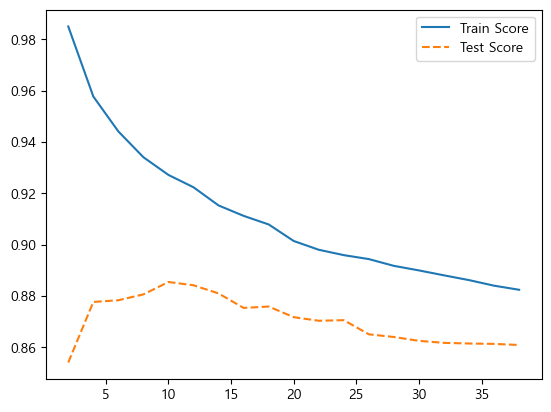

In [87]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

위의 결과를 보면, 잎사귀 최소 자료 수가 14일 때 훈련 세트의 설명력은 0.914이고 테스트 세트의 설명력은 0.878이다. </br>
이 경우, 두 세트의 설명력이 높고 차이도 작으므로 잎사귀 최소 자료 수를 14로 선택하였다.

In [88]:
# 모델 parameter 조정 
v_feature_name = df_train_x.columns

# 노드의 최소 자료 수 = 14모델 
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 14)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
# src = graphviz.Source(dot_graph)
# src.view()

In [89]:
# min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 
train_score = []; test_score = []

para_split = [n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 14,
                                min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score 
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.915,0.881
1,6,0.915,0.881
2,8,0.915,0.881
3,10,0.915,0.881
4,12,0.915,0.881
5,14,0.915,0.881
6,16,0.915,0.881
7,18,0.915,0.881
8,20,0.915,0.881
9,22,0.915,0.881


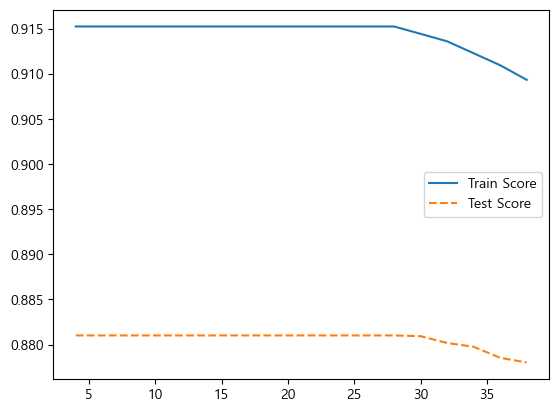

In [90]:
plt.plot(para_split, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--" , label = "Test Score")
plt.legend()

분리 노드의 최소 자료 수(min_samples_split)를 변경한 결과를 확인해보면, </br>
모든 분리 노드의 최소 자료 수에 대해 훈련 세트와 테스트 세트의 설명력이 동일하게 0.914이며, 테스트 세트의 설명력은 0.878로 일정한 것을 알 수 있다.</br>

이 경우, 분리 노드의 최소 자료 수가 4부터 38까지 변화하더라도 모델의 설명력은 변하지 않았기에 따라서,</br>
분리 노드 최소 자료수 30을 선택하였다.

32

In [91]:
# max_depth :최대 깊이 변경에 따른 모델 성능 
train_score = []; test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 14,
                                min_samples_split = 30, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score 
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.478,0.501
1,2,0.641,0.638
2,3,0.754,0.745
3,4,0.813,0.805
4,5,0.858,0.840
5,6,0.880,0.861
6,7,0.895,0.871
7,8,0.903,0.877
8,9,0.909,0.878
9,10,0.911,0.880


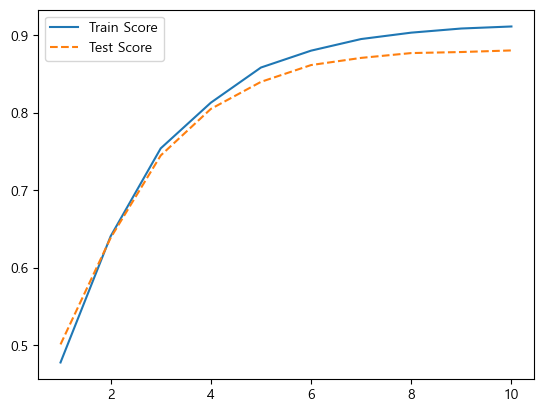

In [92]:
# 모델 설명력 그래프 확인 
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

최대 깊이가 1일 때, 훈련 세트와 테스트 세트의 설명력은 낮은 수준인 0.487와 0.479이다. </br>
그러나 최대 깊이가 2부터 10까지 증가할 때마다 훈련 세트와 테스트 세트의 설명력이 점차 증가하며,</br>
특히 최대 깊이가 9일 때 테스트 세트의 설명력이 0.877로 가장 높은 값을 나타내어 9를 선택하였다.

In [93]:
# 최종 모델 선정
tree_final = DecisionTreeRegressor(min_samples_leaf = 14, min_samples_split = 30, max_depth = 9)
tree_final.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.909
Score on test set: 0.878


위 결괏값에서 학습 데이터셋의 점수는 91%으로, 모델이 학습 데이터 내에서 목표 변수를 잘 예측하는 것을 나타낸다. </br>
테스트 데이터셋의 점수는 87,5%로, 모델이 보지 않은 데이터에 대해서도 잘 일반화하는 것을 보여준다.

In [94]:
# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
11,Power_log,0.617
8,Vehicle_Age,0.253
9,Brand_Group,0.060
4,Engine,0.045
3,Mileage,0.008
10,city_location,0.004
0,Kilometers_Driven,0.003
5,Seats,0.003
7,Brand,0.003
2,Transmission,0.001


Text(0, 0.5, '변수')

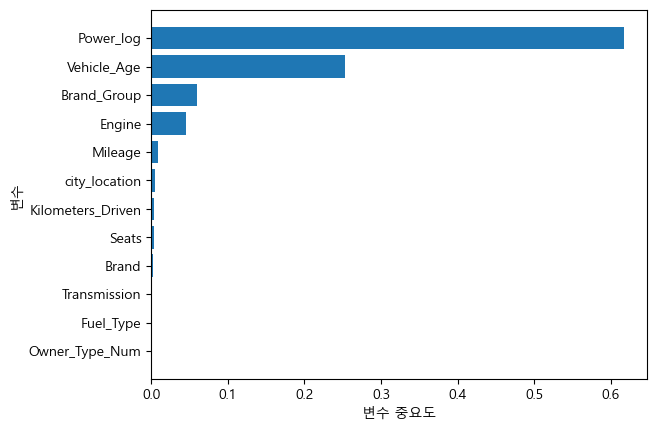

In [95]:
# 설명변수 중요도 그래프
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

최종 중요변수로 Power_log 변수가 전체 설명변수 중에서 가장 큰 중요도를 가지고 있으며, </br>
Vehicle_Age와 Brand_Group 역시 상당한 중요도를 갖고 있다고 나타났다.</br>
반면, Owner_Type_Num 변수의 중요도는 매우 낮은 것으로 나타난다.

In [96]:
# GridSearchCV를 이용한 최적 parameter 찾기 

estimator = DecisionTreeRegressor(random_state = 1234)

param_grid = {"criterion": ["mse","friedman_mse","mae"], "max_features" : [1.0],
                 "max_depth" : para_depth, "min_samples_split" : para_split, "min_samples_leaf" : para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\n best parameter : \n {}".format(grid_dt.best_params_))
print("\n best score : \n {}".format(grid_dt.best_score_.round(3)))

best estimator model : 
DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=1.0,
                      min_samples_leaf=4, min_samples_split=18,
                      random_state=1234)

 best parameter : 
 {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 18}

 best score : 
 0.876


최적의 파라미터 조합을 사용하여 모델을 학습한 결과, 모델의 최상의 점수는 0.88이다. </br>
이는 모델이 주어진 데이터에 대해 88%의 설명력을 가진다는 의미이다.</br>
내가 예측한 DecisionTreeRegressor와 비슷한 결괏값이 도출되었다. </br>
하지만 내가 예측한 최종 모델이 train_set에서 더 높은 점수를 보여주고 있으므로 최종 모델을 선택하는 것이 적합한 것으로 판단이 든다.

#### 랜덤 포레스트

In [97]:
df_raw_y = df_raw['Price_log']
df_raw_x = df_raw.drop(['Price_log'], axis = 1, inplace = False)

In [98]:
# 데이터 분할(train, test 데이터 7:3 비율로 분할)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (4182, 12)
train data Y size : (4182,)
test data X size : (1793, 12)
test data Y size : (1793,)


In [99]:
rf_uncustomized = RandomForestRegressor()
rf_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.989
Score on test set: 0.901


기본 설정의 Random Forest 모델은 훈련 세트, 테스트 세트 둘다에서 매우 높은 성능을 보여주고 있다. </br>
하지만, 훈련 데이터에 과적합된 상태일 수 있다고 판단이 든다.

In [100]:
# n_estimators : 트리 수 변경에 따른 모델 성능 

train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.985,0.885
1,20,0.986,0.894
2,30,0.987,0.897
3,40,0.988,0.896
4,50,0.988,0.895
5,60,0.989,0.897
6,70,0.989,0.896
7,80,0.989,0.896
8,90,0.989,0.896
9,100,0.989,0.897


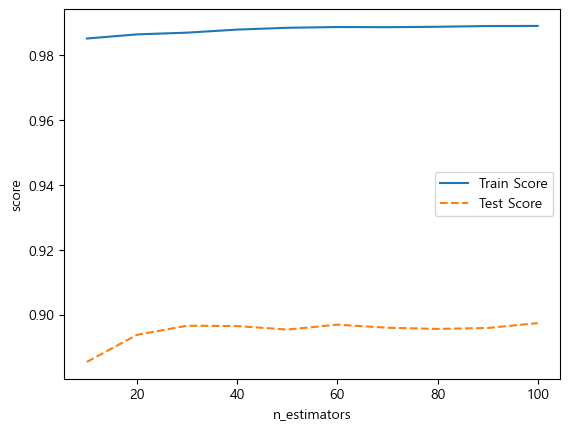

In [101]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

위 결괏값에서 n_estimators가 증가함에 따라 Train과 Test의 성능이 전반적으로 안정적으로 유지된다. </br>
모델의 전반적인 성능을 고려하여 n_estimators의 값으로 100을 선택하였다.

In [102]:
# min samples leaf : 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능 
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators = 100,
                        min_samples_leaf = v_min_samples_leaf, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["MinSamplesLeaf"] = para_leaf
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.989,0.897
1,2,0.977,0.906
2,3,0.967,0.905
3,4,0.960,0.903
4,5,0.953,0.901
5,6,0.948,0.898
6,7,0.943,0.896
7,8,0.939,0.894
8,9,0.935,0.892
9,10,0.931,0.891


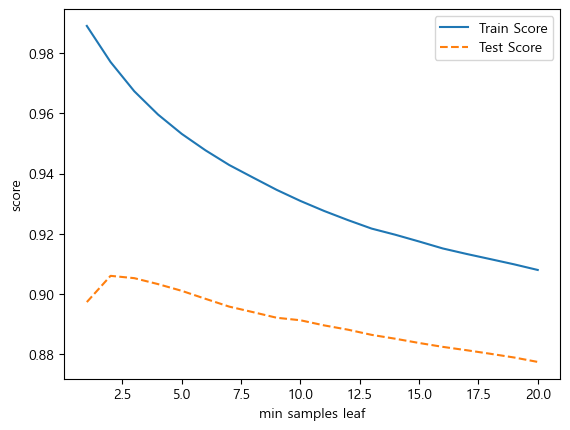

In [103]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

잎사귀 노드의 최소 자료수(min_samples_leaf) 변경에 따른 모델의 성능을 살펴보면, </br>
성능이 안정적으로 유지되는 범위는 2에서 6까지이다. (min_samples_leaf가 증가함에 따라 Train과 Test Score는 감소중)</br>
그 중에서도 Test Score 점수가 가장 높은 2를 선택하였다. 

In [104]:
# min samples split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 2, 
                               min_samples_split = v_min_samples_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["MinSamplesSplit"] = para_split
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.977,0.906
1,6,0.972,0.906
2,8,0.968,0.906
3,10,0.965,0.905
4,12,0.962,0.904
5,14,0.959,0.904
6,16,0.957,0.903
7,18,0.954,0.902
8,20,0.952,0.901
9,22,0.950,0.900


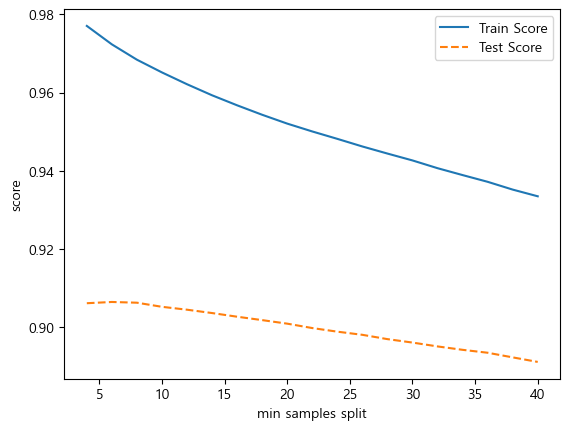

In [105]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

MinSamplesSplit값을 증가시킬수록 훈련 세트와 테스트 세트에서의 성능이 조금씩 감소하는 경향을 보인다. </br>
따라서 MinSamplesSplit값으로 6을 선택하였다.

In [106]:
# max_depth : 최대 깊이 변경에 따른 모델 성능 

train_score = []; test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 2, 
                               min_samples_split = 6, max_depth = v_max_depth ,random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["Depth"] = para_depth
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,Depth,TrainScore,TestScore
0,1,0.512,0.469
1,2,0.689,0.669
2,3,0.791,0.774
3,4,0.847,0.818
4,5,0.886,0.853
5,6,0.909,0.871
6,7,0.927,0.884
7,8,0.940,0.891
8,9,0.950,0.896
9,10,0.957,0.900


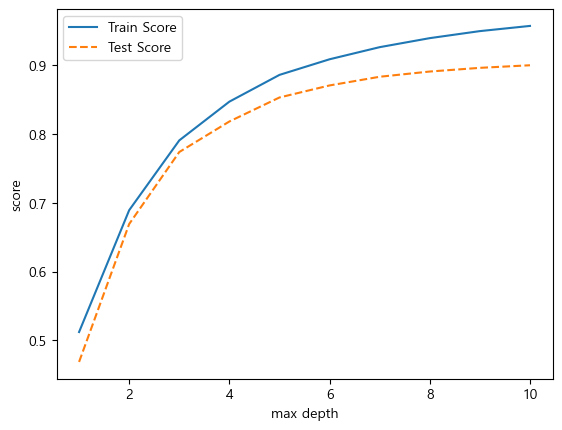

In [107]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

최대 깊이(max_depth) 변경에 따른 모델의 성능을 살펴보면, 깊이가 증가함에 따라 훈련 성능과 테스트 성능이 모두 증가하는 경향을 보인다. </br>
최대 깊이가 6이상부터 테스트 성능의 향상이 미미하거나 훈련 성능과의 차이가 커질 수 있다고 판단해, 6을 선택하였다.

In [108]:
rf_final = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 2, min_samples_split = 6, max_depth = 6)
rf_final.fit(df_train_x, df_train_y)
    
print('Score on training set: {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.908
Score on test set: 0.870


최종 모델의 결괏값은 다음과 같다. </br>
훈련 세트와 테스트 세트 간의 성능 차이가 크지 않고, 테스트 세트에서도 상대적으로 높은 성능을 보여주고 있다.</br>
이는 rf_final 모델이 훈련 데이터에 덜 의존하고 일반화된 모델임을 나타낼 수 있다.</br>
(기존은 training set에 overfitting 된 상태)

In [109]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
11,Power_log,0.673
8,Vehicle_Age,0.231
9,Brand_Group,0.040
4,Engine,0.036
3,Mileage,0.005
0,Kilometers_Driven,0.004
7,Brand,0.004
5,Seats,0.003
2,Transmission,0.002
10,city_location,0.001


Text(0, 0.5, '변수')

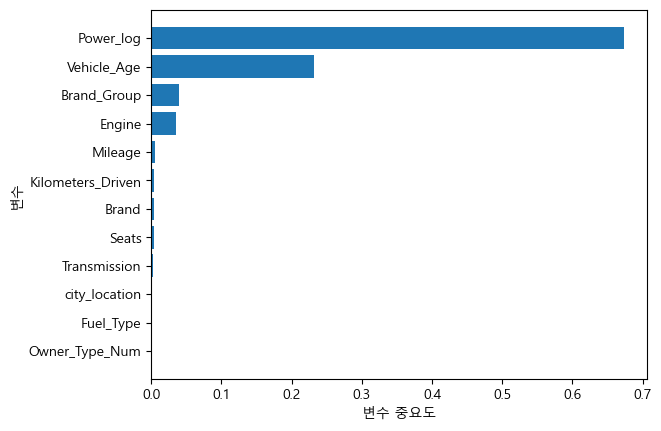

In [110]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

의사결정나무와 마찬가지로 최종 중요변수로 Power_log 변수가 전체 설명변수 중에서 가장 큰 중요도를 가지고 있으며, </br>
Vehicle_Age와 Brand_Group 역시 상당한 중요도를 갖고 있다고 나타났다.</br>
반면, Owner_Type_Num 변수의 중요도는 매우 낮은 것으로 나타난다.

#### 그래디언트 부스팅

In [111]:
df_raw_y = df_raw['Price_log']
df_raw_x = df_raw.drop(['Price_log'], axis = 1, inplace = False)

In [112]:
# 데이터 분할(train, test 데이터 7:3 비율로 분할)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (4182, 12)
train data Y size : (4182,)
test data X size : (1793, 12)
test data Y size : (1793,)


In [113]:
gb_uncustomized = GradientBoostingRegressor()
gb_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.934
Score on test set: 0.918


위 결괏값에서 훈련 세트의 점수는 93.6%이고 테스트 세트의 점수는 90.8%로, </br>
훈련 데이터에 대해서는 잘 동작하고 일반화 성능도 어느 정도 보장되고 있다고 느껴진다. 

In [114]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 21)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['Estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.711,0.711
1,20,0.848,0.845
2,30,0.887,0.882
3,40,0.904,0.897
4,50,0.913,0.903
5,60,0.919,0.908
6,70,0.924,0.912
7,80,0.928,0.914
8,90,0.931,0.917
9,100,0.934,0.918


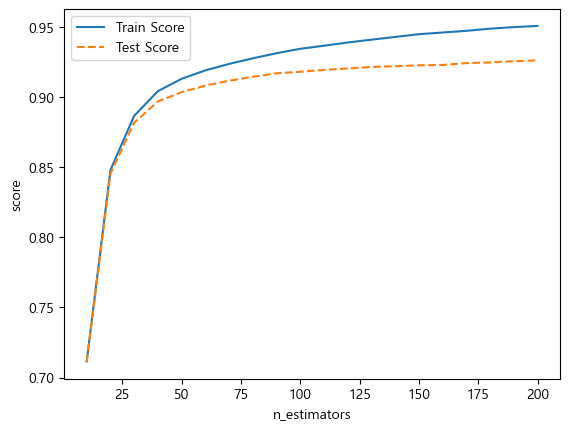

In [115]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

Estimators 개수가 증가함에 따라 훈련 세트와 테스트 세트에서의 점수가 점차 향상되는 것을 볼 수 있다. </br>
하지만 Estimators 개수가 일정 수준 이상이 되면 모델의 성능 향상이 크게 나타나지 않고, 오히려 과적합의 가능성이 증가할 수 있으므로</br>
Estimators 개수로 100을 선택하였다.

In [116]:
# min samples leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능 
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 11)]

for v_min_samples in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = v_min_samples)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.934,0.918
1,2,0.934,0.918
2,3,0.932,0.920
3,4,0.931,0.919
4,5,0.931,0.920
5,6,0.929,0.918
6,7,0.929,0.920
7,8,0.929,0.920
8,9,0.929,0.919
9,10,0.929,0.920


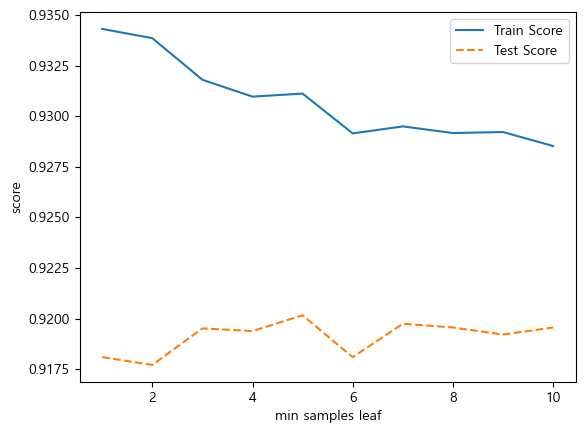

In [117]:
plt.plot(para_leaf, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score");plt.xlabel("min samples leaf")
plt.legend()

 위 결괏값에서 MinSamplesLeaf 값이 증가함에 따라 훈련 세트와 테스트 세트에서의 점수가 약간의 변동을 보이는 것을 볼 수 있다. </br>
 전반적인 사항을 고려하여 Test Score 값이 높에 측정된 4를 선택하였다.

In [118]:
# min samples split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 
train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 4, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.931,0.919
1,4,0.931,0.919
2,6,0.931,0.919
3,8,0.931,0.919
4,10,0.931,0.920
5,12,0.930,0.919
6,14,0.931,0.919
7,16,0.931,0.919
8,18,0.930,0.918
9,20,0.930,0.918


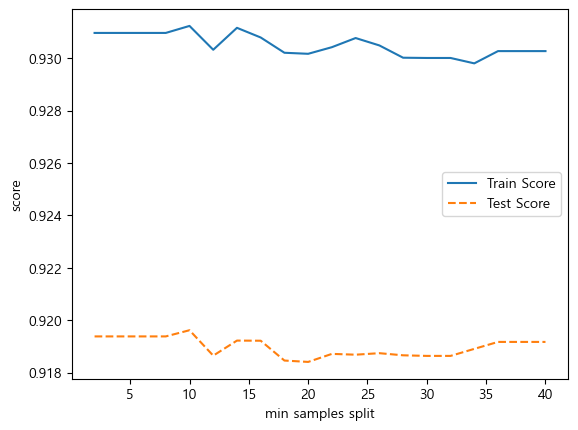

In [119]:
plt.plot(para_split, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score");plt.xlabel("min samples split")
plt.legend()


분리 노드의 최소 자료 수(min_samples_split)가 증가함에 따라 TrainScore와 TestScore가 모두 일정한 값을 가지고 있으며, 변화가 거의 없다고 판단이 된다. </br>
이는 분리 노드의 최소 자료 수가 모델에 미치는 영향이 크게 나타나지 않는다는 것을 의미한다.</br>
따라서 적절한 기본 값인 4를 선택하였다.

In [120]:
# max depth : 최대 깊이 변경에 따른 모델 성능 
train_score = []; test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 4,
                                   min_samples_split = 4 , max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.871,0.871
1,2,0.908,0.902
2,3,0.931,0.919
3,4,0.949,0.929
4,5,0.961,0.930
5,6,0.971,0.931
6,7,0.981,0.932
7,8,0.987,0.933
8,9,0.991,0.931
9,10,0.994,0.930


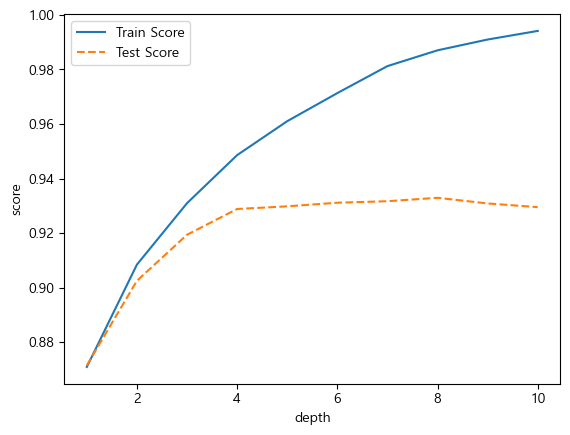

In [121]:
plt.plot(para_depth, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score");plt.xlabel("depth")
plt.legend()

위 결괏값에서 모델의 성능은 최대 깊이가 3까지 증가하면서 크게 향상되었으며, </br>
깊이가 6이상일 때는 성능이 점진적으로 감소하는 경향을 보인다.</br>
따라서, 깊이가 3일 때 모델이 가장 좋은 성능을 보이는 것으로 생각이 들어 3을 선택하였다.

In [122]:
# learning rate : 학습률 변경에 따른 모델 성능 
train_score = []; test_score = []

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 100, min_samples_leaf = 4, 
                                   min_samples_split = 4 , max_depth = 3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.931,0.919
1,0.2,0.946,0.927
2,0.3,0.954,0.925
3,0.4,0.957,0.925
4,0.5,0.961,0.926
5,0.6,0.962,0.921
6,0.7,0.963,0.924
7,0.8,0.965,0.921
8,0.9,0.966,0.910


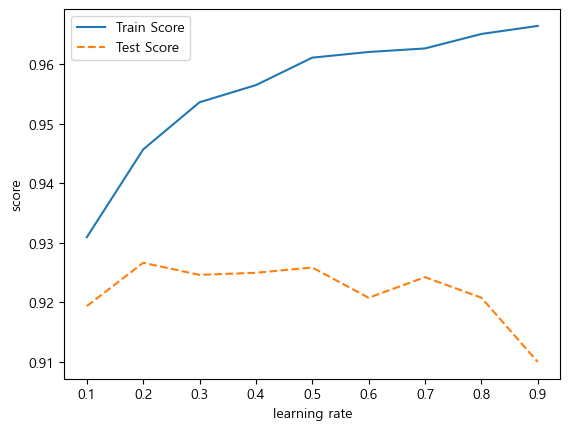

In [123]:
plt.plot(para_lr, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score");plt.xlabel("learning rate")
plt.legend()

위의 결과를 통해 LearningRate 값이 0.2일 때 모델이 가장 좋은 성능을 보이는 것으로 생각이 들어 0.2를 선택하였다.

In [124]:
gb_final = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 4, min_samples_split = 4, max_depth = 3, learning_rate = 0.2)
gb_final.fit(df_train_x, df_train_y)
    
print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.946
Score on test set: 0.927


최종 모델인 gb_final은 학습 데이터셋에서 약 94.7%의 정확도를 달성하였으며, 테스트 데이터셋에서는 약 92.3%의 정확도를 보였다. </br>
이는 모델이 학습 데이터에 대해 잘 적합되었으며, 새로운 데이터인 테스트 데이터에 대해서도 좋은 성능을 보였다는 것을 의미한다.

In [125]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
11,Power_log,0.486
8,Vehicle_Age,0.226
4,Engine,0.141
2,Transmission,0.051
9,Brand_Group,0.042
7,Brand,0.014
1,Fuel_Type,0.012
10,city_location,0.011
0,Kilometers_Driven,0.010
3,Mileage,0.005


Text(0, 0.5, '변수')

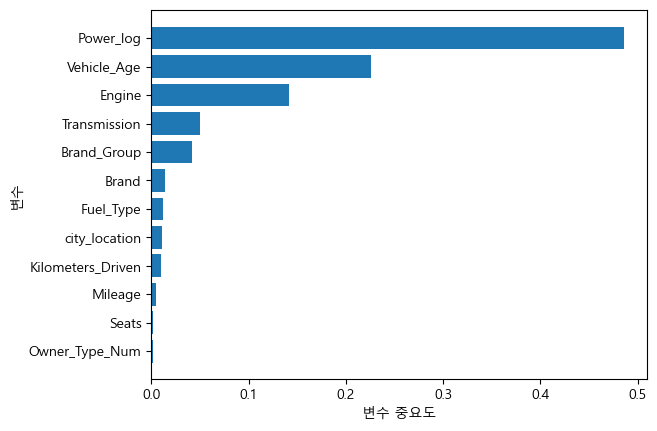

In [126]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

의사결정나무, 랜덤포레스트와 마찬가지로 최종 중요변수로 Power_log 변수가 전체 설명변수 중에서 가장 큰 중요도를 가지고 있으며, </br>
Vehicle_Age 역시 상당한 중요도를 갖고 있다고 나타났다.</br>
다만 세 번째 순위는 의사결정나무, 랜덤포레스트와 달리 Engine의 중요도가 더 높다고 나타났다. </br>
마지막으로, Owner_Type_Num 변수의 중요도는 매우 낮은 것으로 나타난다.

#### 모델평가

In [127]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [128]:
lr_model = smf.ols(formula = 'Price_log ~ Power_log + Vehicle_Age + Engine', data = df_train)
lr_result = lr_model.fit()

dt_model = DecisionTreeRegressor(min_samples_leaf = 14, min_samples_split = 30, max_depth = 9)
dt_model.fit(df_train_x, df_train_y)

rf_model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 2, min_samples_split = 6, max_depth = 6)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 4, min_samples_split = 4, max_depth = 3, learning_rate = 0.2)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=4,
                          min_samples_split=4)

In [129]:
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]

mse, rmse, mae, mape = [],[],[],[]

In [130]:
lr_y_pred = lr_result.predict(df_test)

mse.append(mean_squared_error(df_test['Price_log'], lr_y_pred))
rmse.append(root_mean_squared_error(df_test['Price_log'], lr_y_pred))
mae.append(mean_absolute_error(df_test['Price_log'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Price_log'], lr_y_pred))

In [131]:
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [132]:
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [133]:
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

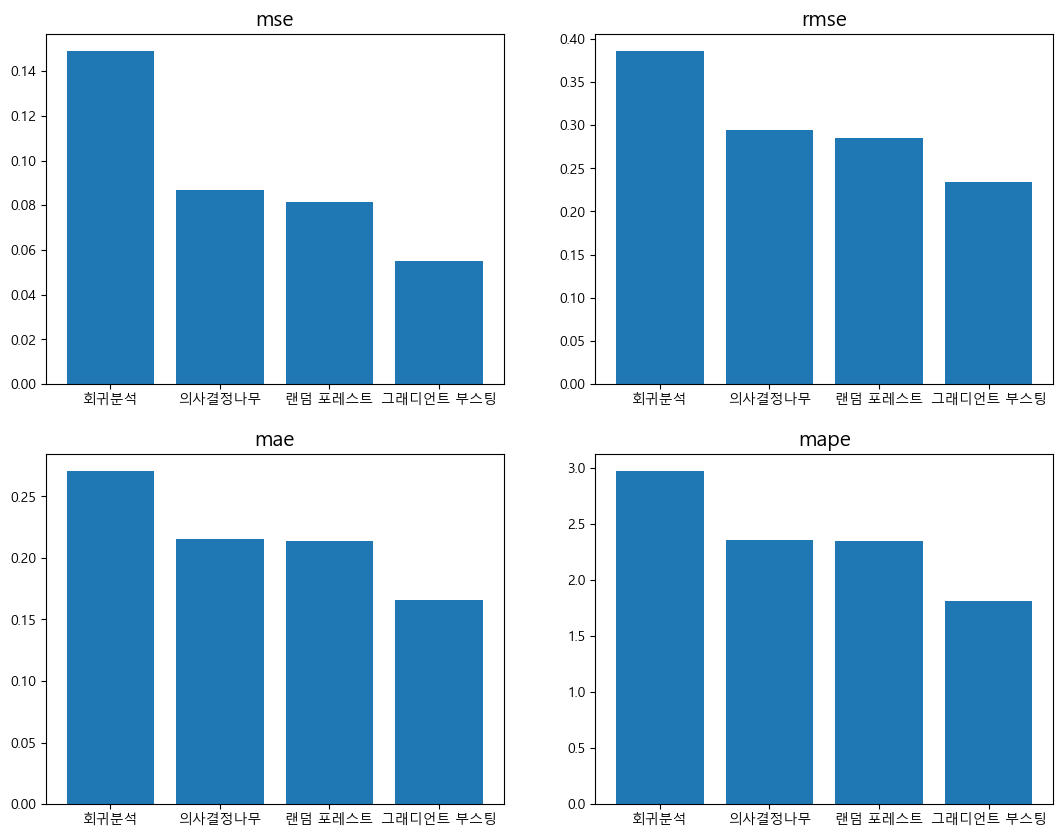

In [134]:
fig, ax = plt.subplots(2,2, figsize = (13, 10))

ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)

MSE (Mean Squared Error), RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error)는 </br>
회귀 모델의 예측 성능을 평가하기 위해 사용되는 지표이다.</br>
이들 지표의 값이 작을수록 모델의 예측이 실제 값과 잘 일치한다고 할 수있다.</br>
전반적인 위 그래프 결과를 토대로 최종 모델로 그래디언트 부스팅을 선택하기로 하였다.

In [135]:
# 최종 모델 선정
tree_final = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 4, min_samples_split = 4, max_depth = 3, learning_rate = 0.2)
tree_final.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.946
Score on test set: 0.927


따라서 최종적으로 선택한 GradientBoostingRegressor 모델은 학습 데이터와 테스트 데이터 모두에서 높은 예측 성능을 보여주고 있다. </br>
또한 학습 데이터에 대해서도 테스트 데이터에 대해서도 비슷한 정도의 설명력을 갖고 있으므로, 과적합(Overfitting) 문제도 크게 발생하지 않았다고 할 수 있다. </br>따라서, 이 모델은 충분히 신뢰할 수 있는 예측 모델로서 활용될 수 있을 것이라 생각이 든다.